In [1]:
import numpy as np
import seaborn as sns
import scipy as scipy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import warnings
from math import sqrt
import statsmodels
import statsmodels.api as smapi

warnings.filterwarnings('ignore')

# 1. Ознакомьтесь с набором данных mpg из библиотеки Seaborn. (df =sns.load_dataset(’mpg’))

Набор данных MPG содержит информацию о милях на галлон для различных моделей автомобилей и их атрибутах. Он включает такие характеристики, как мили на галлон, количество цилиндров в двигателе, рабочий объем двигателя, мощность двигателя, вес автомобиля, ускорение, год выпуска модели, происхождение автомобиля и название модели автомобиля.

Особенности и характеристики
  * mpg : миль на галлон (числовое значение)
  * цилиндры : Количество цилиндров в двигателе (числовое)
  * объем : объем двигателя в кубических дюймах (числовой)
  * лошадиная сила : Мощность двигателя в лошадиных силах (числовая)
  * вес : Вес транспортного средства в фунтах (числовой)
  * ускорение : Ускорение в секундах от 0 до 60 миль/ч (числовое)
  * model_year : Год выпуска модели (категориальный)
  * origin : Происхождение автомобиля (1 = американское, 2 = европейское, 3 = японское) (категориальное)
  * имя : Название модели автомобиля (строка)

In [2]:
# Ознакомьтесь с набором данных mpg из библиотеки Seaborn. (df =sns.load_dataset(’mpg’))
df_mpg =sns.load_dataset('mpg')
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


# 2. Посчитайте количество строк и столбцов

In [3]:
print(f'Количество столбцов в наборе: {len(df_mpg.columns)}')
print(f'Количество строк в наборе: {len(df_mpg.index)}')

Количество столбцов в наборе: 9
Количество строк в наборе: 398


# 3. Проведите разведочный анализ

То есть:
  * для каждой числовой переменной вычислите:
      * Долю пропусков
      * Максимальное и минимальное значение
      * Среднее значение
      * Медиану
      * Дисперсию
      * Квантиль 0.1 и 0.9
      * Квартиль 1 и 3
  * для каждой категориальной переменной вычислите:
      * Долю пропусков
      * Количество уникальных значений
      * Моду

In [4]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Для большинства столбцов отношение к числовым или категориальным переменным можно сделать по типу данных.
Столбцы `['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']` - числовые. 
Столбцы `['origin', 'name']` - категориальные.
Особым образом стоит рассмотреть столбец model_year. По сути это своеобразная шкала времени. И этот столбец можно рассматривать и как числовой, и как категориальный - зависит от задачи.

In [5]:
# Добавим столбец, в котором год выпуска представлен как строка
df_mpg["model_year_str"] = df_mpg["model_year"].apply(str) 

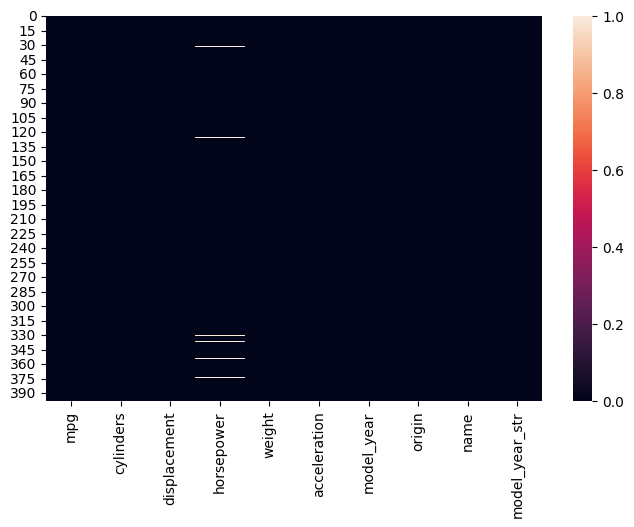

In [6]:
plt.figure(figsize=(8,5))
sns.heatmap(df_mpg.isna())
plt.show()

Небольшое количество пропусков есть только у столбца horsepower.

In [7]:
print(f"  Доля пропусков в столбце horsepower (%): {len(df_mpg[df_mpg['horsepower'].isna()])/len(df_mpg)*100:2.3f}")

  Доля пропусков в столбце horsepower (%): 1.508


In [8]:
# Числовые: Максимальное и минимальное значение, Среднее значение, Медиану, Квантиль 0.1 и 0.9, Квартиль 1 и 3
df_mpg.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
10%,14.000000,4.000000,90.000000,67.000000,1988.500000,12.000000,71.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
90%,34.330000,8.000000,350.000000,157.700000,4275.200000,19.000000,81.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [9]:
# Дисперсию
num_columns = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year']
print("Дисперсия: ")
for column in num_columns:
    print(f"  {column}:  {df_mpg[column].var():.4f}")

Дисперсия: 
  mpg:  61.0896
  cylinders:  2.8934
  displacement:  10872.1992
  horsepower:  1481.5694
  weight:  717140.9905
  acceleration:  7.6048
  model_year:  13.6724


In [10]:
# Категориальные: Количество уникальных значений, моду
df_mpg.describe(include=['O'])

,origin,name,model_year_str
count,398,398,398
unique,3,305,13
top,usa,ford pinto,73
freq,249,6,40


# 4. Сформулируйте и проверьте минимум 2 статистические гипотезы. 

Выбор критериев для проверки гипотез требуется обосновать. Сделать выводы в терминах предметной области.

<Axes: >

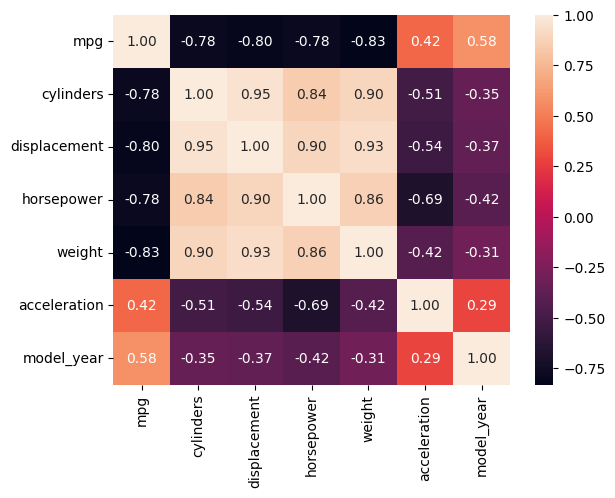

In [11]:
columns = ['mpg','cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'] 
df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_mpg[columns]), columns=columns)
cor =df_minmax.corr(numeric_only = True)
sns.heatmap(cor, annot=True, fmt='.2f')

Можно сделать предположения:
1. Экономичность (mpg) имеет определенную обратную зависимость от объема двигателя, количества цилиндров, мощности и веса автомобиля.
2. Объема двигателя, количество цилиндров, мощность и вес автомобиля довольно сильно коррелируют друг с другом
3. Есть определенная корреляция ускорения от мощности двигателя 

In [12]:
def check_pvalue(pvalue, critical_pvalue=0.05):
    if pvalue < critical_pvalue:
        print("H0 отвергаем")
    else:
        print("Не можем отвергнуть H0")

## Проверка распределения столбца mpg
Требуется, чтобы понять как проверять следующую гипотезу.

H0: mpg подчиняется нормальному распределению \
H1: mpg не подчиняется нормальному распределению

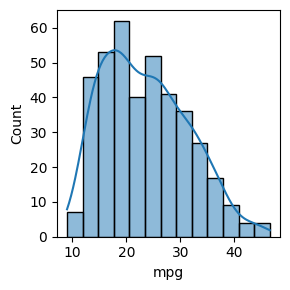

In [13]:
plt.figure(figsize=(3,3),facecolor='white')
sns.histplot(x=df_mpg["mpg"], kde=True)
plt.tight_layout()

In [14]:
res = scipy.stats.shapiro(df_mpg["mpg"])
print(res)
check_pvalue(res.pvalue)

ShapiroResult(statistic=0.9679659577379658, pvalue=1.1833854157896544e-07)
H0 отвергаем


In [15]:
res = scipy.stats.kstest(df_mpg["mpg"], 'norm')
print(res) # вывод результата
check_pvalue(res.pvalue)

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=9.0, statistic_sign=-1)
H0 отвергаем


Вывод: График и тесты показывают, что mpg имеет распределение, отличное от нормального

## Сравнение mpg автомобилей usa и europe+japan
Есть гипотеза, что американские автомобили менее экономичны, чем европейские и японские. Т.е. американские автомобили проходят меньше миль на одном галлоне, чем европейские и японские.

H0: среднее mpg автомобилей usa одинаково с mpg автомобилей europe+japan \
H1: среднее mpg автомобилей europe+japan лучше (больше) чем mpg автомобилей usa

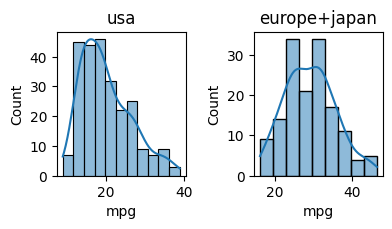

In [16]:
df_usa = df_mpg[df_mpg["origin"]=="usa"]
df_ej = df_mpg[df_mpg["origin"]!="usa"]
plt.figure(figsize=(6,6),facecolor='white')
pltno =1
plt.subplot(3,3,1, title="usa")
sns.histplot(x=df_usa["mpg"], kde=True)
plt.subplot(3,3,2, title="europe+japan")
sns.histplot(x=df_ej["mpg"], kde=True)
plt.tight_layout()

In [17]:
res = scipy.stats.mannwhitneyu(df_usa["mpg"], df_ej["mpg"], alternative = "less")
print(res) # вывод результата
check_pvalue(res.pvalue)

MannwhitneyuResult(statistic=5852.5, pvalue=1.3832300467978675e-30)
H0 отвергаем


Вывод: График и тест показывают, что европейские и японские автомобили экономичнее, чем американские.

## Проверка распределения столбца acceleration
Требуется, чтобы понять как проверять следующую гипотезу.

H0: acceleration подчиняется нормальному распределению \
H1: acceleration не подчиняется нормальному распределению

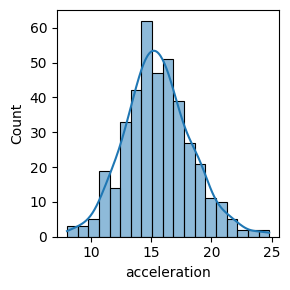

In [18]:
plt.figure(figsize=(3,3),facecolor='white')
sns.histplot(x=df_mpg["acceleration"], kde=True)
plt.tight_layout()

In [19]:
res = scipy.stats.shapiro(df_mpg["acceleration"])
print(res)
check_pvalue(res.pvalue)

ShapiroResult(statistic=0.9923786617732914, pvalue=0.03986944421633885)
H0 отвергаем


In [20]:
res = scipy.stats.kstest(df_mpg["acceleration"], 'norm')
print(res)
check_pvalue(res.pvalue)

KstestResult(statistic=0.9999999999999993, pvalue=0.0, statistic_location=8.0, statistic_sign=-1)
H0 отвергаем


Вывод: Несмотря на то, что на графике распределение выглядит как близкое к нормальному, тест показывает обратное.

## Сравнение acceleration автомобилей с разным количеством цилиндров
Есть гипотеза, что большое количество цилиндров (более 4) дает более высокое ускорение

H0: среднее acceleration автомобилей с >4 цилиндрами одинаково с acceleration автомобилей с количеством цилиндров <=4 \
H1: среднее acceleration автомобилей с >4 цилиндрами выше acceleration автомобилей с количеством цилиндров <=4

In [21]:
df_68 = df_mpg[df_mpg["cylinders"]>4]
df_14 = df_mpg[df_mpg["cylinders"]<=4]

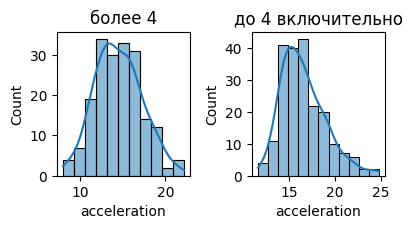

In [22]:
plt.figure(figsize=(6,6),facecolor='white')
plt.subplot(3,3,1, title="более 4")
sns.histplot(x=df_68["acceleration"], kde=True)
plt.subplot(3,3,2, title="до 4 включительно")
sns.histplot(x=df_14["acceleration"], kde=True)
plt.tight_layout()

In [23]:
res = scipy.stats.mannwhitneyu(df_68["acceleration"], df_14["acceleration"], alternative = "greater")
print(res) 
check_pvalue(res.pvalue)

MannwhitneyuResult(statistic=11513.0, pvalue=0.9999999999996937)
Не можем отвергнуть H0


Вывод: Нельзя утверждать, что больше цилиндров приводит к более высокому ускорению.

## Чем выше мощность, чем выше ускорение
Есть гипотеза, что чем больше мощность, тем более высокое ускорение

H0: При увеличении мощности двигателя ускорение не меняется \
H1: При увеличении мощности двигателя ускорение растет

In [24]:
d = df_mpg[['acceleration', 'horsepower']].dropna()

column2 = 'acceleration'
column1 = 'horsepower'
#column2 = 'mpg'

res = scipy.stats.pearsonr(d[column1], d[column2], alternative='two-sided')
print(res) 
check_pvalue(res.pvalue)

res = scipy.stats.spearmanr(d[column1], d[column2], alternative='two-sided')
print(res) 
check_pvalue(res.pvalue)

res = scipy.stats.kendalltau(d[column1], d[column2], alternative='two-sided')
print(res) 
check_pvalue(res.pvalue)

PearsonRResult(statistic=-0.6891955103342364, pvalue=1.5818862297816695e-56)
H0 отвергаем
SignificanceResult(statistic=-0.6581423040218369, pvalue=5.157840368072828e-50)
H0 отвергаем
SignificanceResult(statistic=-0.4882387207037366, pvalue=2.0724715387036123e-45)
H0 отвергаем


Вывод: На основании коэффициентов каждого теста и полученного p-value можно сделать вывод, что зависимость ускорения от мощности двигателя есть  (чем больше мощность - тем выше ускорение) есть, и довольно высокая.

## Чем больше объем двигателя, тем выше ускорение. 
Ускорение во многом зависит от крутящего момента, который, в свою очередь, во многом зависит от объема двигателя, т.к. объем двигателя определяет объем топлива, сгораемого в моменте.

H0: При увеличении объема двигателя ускорение не меняется \
H1: При увеличении объема двигателя ускорение растет

In [25]:
d = df_mpg[['acceleration', 'displacement']].dropna()

column2 = 'acceleration'
column1 = 'displacement'

res = scipy.stats.pearsonr(d[column1], d[column2], alternative='two-sided')
print(res) 
check_pvalue(res.pvalue)

res = scipy.stats.spearmanr(d[column1], d[column2], alternative='two-sided')
print(res) 
check_pvalue(res.pvalue)

res = scipy.stats.kendalltau(d[column1], d[column2], alternative='two-sided')
print(res) 
check_pvalue(res.pvalue)

PearsonRResult(statistic=-0.5436840835009298, pvalue=5.420877365930116e-32)
H0 отвергаем
SignificanceResult(statistic=-0.49651192134583266, pvalue=3.658901286117616e-26)
H0 отвергаем
SignificanceResult(statistic=-0.35210980075634984, pvalue=8.981513821532601e-25)
H0 отвергаем


Вывод: На основании коэффициентов каждого теста и полученного p-value можно сделать вывод, что зависимость ускорения от объема двигателя (чем больше объем - тем выше ускорение) есть, но умеренная.

Т.е. ускорение в большей степени зависит от мощности и в меньшей от объема двигателя.

## Более новые машины более экономичны

Предположение, что более новые машины более экономичны, т.е. у них выше mpg

H0: среднее значение mpg в первой половине временного ряда и во второй половине - одинаковы \
H1: средние значения mpg в первой половине временного ряда меньше, чем во второй

In [26]:
# Подготовим данные с датой в индексе
df_mpg["year-date"] = pd.to_datetime("19"+df_mpg["model_year_str"]+"-01-01 00:00:00", yearfirst=True)
df_timeseries = pd.DataFrame({'year-date': df_mpg["year-date"], 'mpg': df_mpg["mpg"]})
df_timeseries.set_index('year-date', inplace=True)

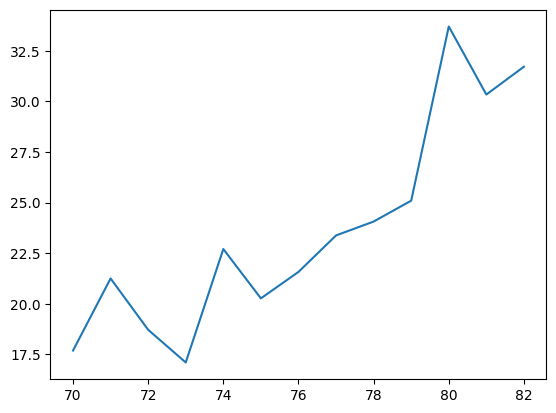

In [27]:
# визуализация средних mpg по годам
plt.plot(df_mpg.groupby('model_year').agg({'mpg': ['mean']}) )

In [28]:
m = df_timeseries.index[int(len(df_timeseries.index)/2+1)]
r1 = smapi.stats.DescrStatsW(df_timeseries[:m])
r2 = smapi.stats.DescrStatsW(df_timeseries[m:])
res = smapi.stats.CompareMeans(r1,r2).ttest_ind(alternative='larger')
print(res)
check_pvalue(res[1])
res = smapi.stats.CompareMeans(r1,r2).ttest_ind(alternative='smaller')
print(res)
check_pvalue(res[1])
res = smapi.stats.CompareMeans(r1,r2).ttest_ind(alternative='two-sided')
print(res)
check_pvalue(res[1])


(array([-10.95914664]), array([1.]), 430.0)
Не можем отвергнуть H0
(array([-10.95914664]), array([4.08426102e-25]), 430.0)
H0 отвергаем
(array([-10.95914664]), array([8.16852205e-25]), 430.0)
H0 отвергаем


Вывод: Можно сделать вывод, что среднее mpg в первом полупериоде меньше, чем среднее во втором.

In [29]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
def adf_test(timeseries):
    dftest = statsmodels.tsa.stattools.adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    return dfoutput

res = adf_test(df_timeseries['mpg'])
print("Results of Dickey-Fuller Test:")
print(res)
check_pvalue(res[1])

Results of Dickey-Fuller Test:
Test Statistic                -5.831272e+00
p-value                        3.969929e-07
#Lags Used                     1.000000e+00
Number of Observations Used    3.960000e+02
Critical Value (1%)           -3.446972e+00
Critical Value (5%)           -2.868866e+00
Critical Value (10%)          -2.570673e+00
dtype: float64
H0 отвергаем


In [30]:
# https://www.statsmodels.org/dev/examples/notebooks/generated/stationarity_detrending_adf_kpss.html
def kpss_test(timeseries):
    kpsstest = statsmodels.tsa.stattools.kpss(timeseries) #, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    return kpss_output
print("Results of KPSS Test:")
res = kpss_test(df_timeseries['mpg'])
print(res)
check_pvalue(res[1])

Results of KPSS Test:
Test Statistic            2.161353
p-value                   0.010000
Lags Used                11.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
H0 отвергаем


# 5. Реализуйте стохастический и обычный градиентный спуск вручную для этих данных:y=’mpg’ и x=’weight’

In [31]:
df_mpg_weight = df_mpg[['mpg', 'weight']]
df_mpg_weight[['mpg_y', 'weight_X']] = preprocessing.MinMaxScaler().fit_transform(df_mpg_weight[['mpg', 'weight']])

<Axes: >

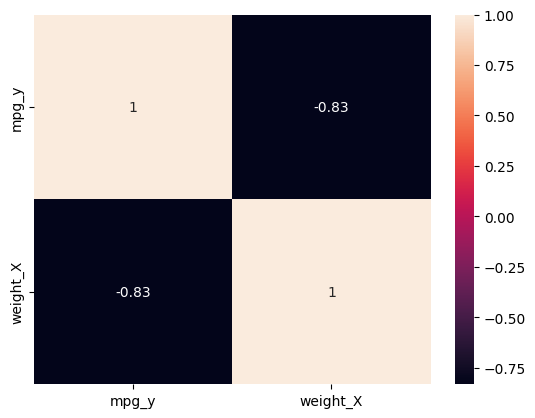

In [32]:
sns.heatmap(df_mpg_weight[['mpg_y', 'weight_X']].corr(numeric_only = True),annot=True)

<Axes: xlabel='weight_X', ylabel='mpg_y'>

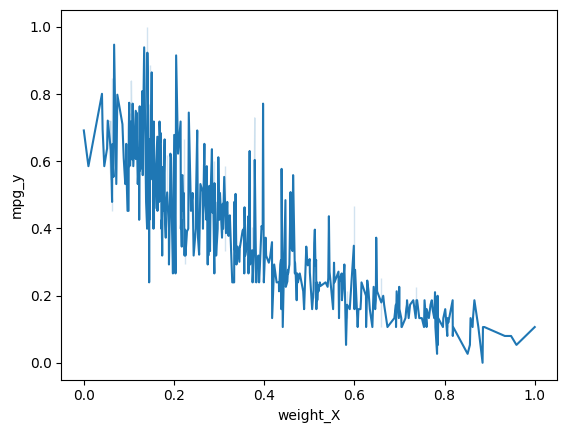

In [33]:
sns.lineplot(y='mpg_y',x='weight_X', data=df_mpg_weight)

<Axes: xlabel='weight', ylabel='mpg'>

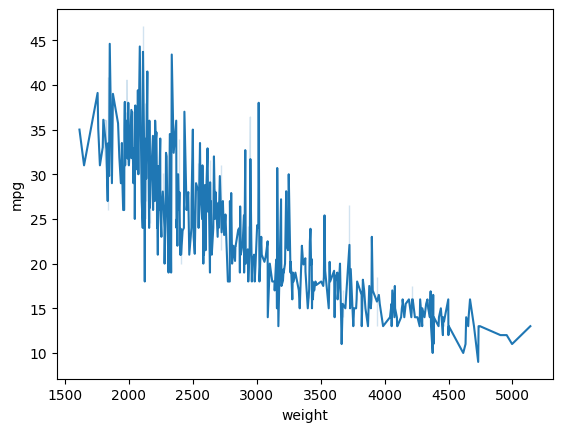

In [34]:
sns.lineplot(y='mpg',x='weight', data=df_mpg_weight)

## В1. Стохастический градиентный спуск

In [35]:
def my_sgd1(X, y, X_orig, y_orig, n_iterations = 20, seed=42, learning_rate=0.1):
    # Инициализация генератора случайных данных
    np.random.seed(seed)

    # Начальные значения параметров
    a_n = np.random.randn()
    b_n = np.random.randn()
    learning_rate = 0.1
    m = len(X)
    
    # Хранение значений параметров для визуализации
    a_history = [a_n]
    b_history = [b_n]
    
    # Стохастический градиентный спуск
    for i in range(n_iterations):
        rand_index = np.random.randint(m)
        x_i = X[rand_index]
        y_i = y[rand_index]
        y_pred = a_n * x_i + b_n
        error = y_pred - y_i
        a_gradient = 2 * x_i * error
        b_gradient = 2 * error
        a_n = a_n - learning_rate * a_gradient
        b_n = b_n - learning_rate * b_gradient
        a_history.append(a_n)
        b_history.append(b_n)
    
    
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X, a_n * X + b_n, color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(a_history, label='a', color='green')
    plt.plot(b_history, label='b', color='purple')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()
    plt.show()
    
    
    a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
    b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)
    
    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * X + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)
    
    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a_history, b_history, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of MSE')
    plt.colorbar(label='MSE')
    
    plt.tight_layout()
    plt.show()


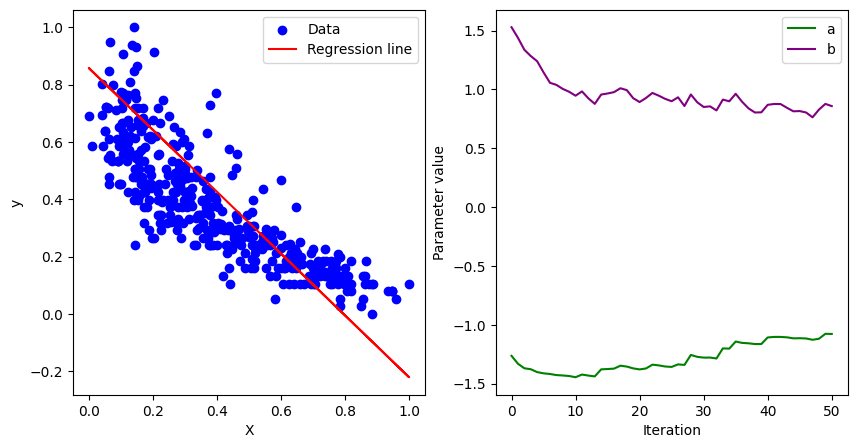

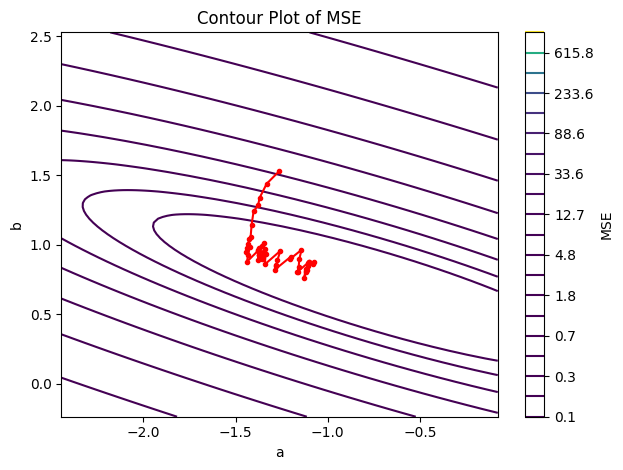

In [36]:
my_sgd1(X=np.array(df_mpg_weight["weight_X"].values), y=np.array(df_mpg_weight["mpg_y"].values), 
        X_orig=df_mpg_weight["weight"], y_orig=df_mpg_weight["mpg"],
        n_iterations=50, seed=30, learning_rate=0.1)

## В2. Стохастический градиентный спуск
https://www.geeksforgeeks.org/ml-stochastic-gradient-descent-sgd/

In [37]:
class SGD:
    def __init__(self, lr=0.01, epochs=1000, batch_size=32, tol=1e-3):
        self.learning_rate = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.tolerance = tol
        self.weights = None
        self.bias = None

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def gradient(self, X_batch, y_batch):
        y_pred = self.predict(X_batch)
        error = y_pred - y_batch
        gradient_weights = np.dot(X_batch.T, error) / X_batch.shape[0]
        gradient_bias = np.mean(error)
        return gradient_weights, gradient_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.random.randn(n_features)
        self.bias = np.random.randn()

        for epoch in range(self.epochs):
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            for i in range(0, n_samples, self.batch_size):
                X_batch = X_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                gradient_weights, gradient_bias = self.gradient(X_batch, y_batch)
                self.weights -= self.learning_rate * gradient_weights
                self.bias -= self.learning_rate * gradient_bias

            if epoch % 100 == 0:
                y_pred = self.predict(X)
                loss = self.mean_squared_error(y, y_pred)
                print(f"Epoch {epoch}: Loss {loss}")

            if np.linalg.norm(gradient_weights) < self.tolerance:
                print("Convergence reached.")
                break

        return self.weights, self.bias

In [38]:
# Create random dataset with 100 rows and 5 columns
X = np.random.randn(100, 5)
# create corresponding target value by adding random
# noise in the dataset
y = np.dot(X, np.array([1, 2, 3, 4, 5]))\
    + np.random.randn(100) * 0.1

In [39]:
#df_mpg_weight["weight_X"].values

In [40]:
# Create an instance of the SGD class
model = SGD(lr=0.01, epochs=1000,
            batch_size=32, tol=1e-3)
w,b=model.fit(np.array([df_mpg_weight["weight_X"].values]), df_mpg_weight["mpg_y"].values)
# Predict using predict method from model
y_pred = w*df_mpg_weight["weight_X"]+b
#y_pred

Epoch 0: Loss 0.7042808409939675
Convergence reached.


## В3. Стохастический градиентный спуск

https://github.com/arseniyturin/SGD-From-Scratch

In [41]:
def scale(x):
    min = x.min()
    max = x.max()
    return pd.Series([(i - min)/(max - min) for i in x])

In [42]:
def SGD(X, y, lr=0.05, epoch=10, batch_size=1, seed=42):
        
    '''
    Stochastic Gradient Descent for a single feature
    '''

    # Инициализация генератора случайных данных
    np.random.seed(seed)

    # lists to store learning process
    a, b, mse, indexes = [], [], [], []
    # initial parameters
    a_current = np.random.randn()
    b_current = np.random.randn()
    
    for _ in range(epoch):
        
        index_current = np.random.randint(0, len(X), batch_size) # random sample
        
        Xs = X[index_current] 
        ys = y[index_current] 
        N = len(Xs)
        
        f = ys - (a_current*Xs + b_current)
        
        # Updating parameters m and b
        a_current -= lr * (-2 * Xs.dot(f).sum() / N)
        b_current -= lr * (-2 * f.sum() / N)
        
        a.append(a_current)
        b.append(b_current)
        mse.append(mean_squared_error(y, a_current*X+b_current))        
        indexes.append(index_current)
    
    return a, b, mse, indexes

def plot_regression(X, y, y_pred, a, b, title="Linear Regression #1", xlabel="X", ylabel="y"):
    plt.scatter(X, y, label='Data', c='#388fd8', s=6)
    for i in range(len(a)):
        plt.plot(X, a[i]*X + b[i], lw=1, c='#caa727', alpha=0.35)
    plt.plot(X, y_pred, c='#ff7702', lw=3, label='Regression')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(frameon=True, loc=1, fontsize=10, borderpad=.6)
    plt.tick_params(direction='out', length=6, color='#a0a0a0', width=1, grid_alpha=.6)


def plot_regression2(X, y, a, b, title="Linear Regression #2", xlabel="X", ylabel="y"):
    plt.scatter(X, y, color='blue', label='Data', s=6)
    plt.title(title)
    plt.plot(X, a_last * X + b_last, color='red', label='Regression line')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()

def plot_parameters_value(a, b, title="Parameters value"):
    plt.plot(a, label='a', color='green')
    plt.plot(b, label='b', color='purple')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()

def plot_mse(mse, title='SGD Optimization'):
    plt.plot(range(len(mse)), mse)
    plt.title(title) #, fontdict={'fontsize': 14})
    plt.xlabel('Epochs') #, fontdict={'fontsize': 11})
    plt.ylabel('MSE') #, fontdict={'fontsize': 11})

def plot_contour_mse(a, b, mse, title='Contour Plot of MSE'):
    a_vals = np.linspace(min(a) - 1, max(a) + 1, 100)
    b_vals = np.linspace(min(b) - 1, max(b) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)
    
    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * X + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)
    
    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a, b, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title(title)
    plt.colorbar(label='MSE')

MSE: 0.05077313276343912 0.05077313276343912
index_last: [93]


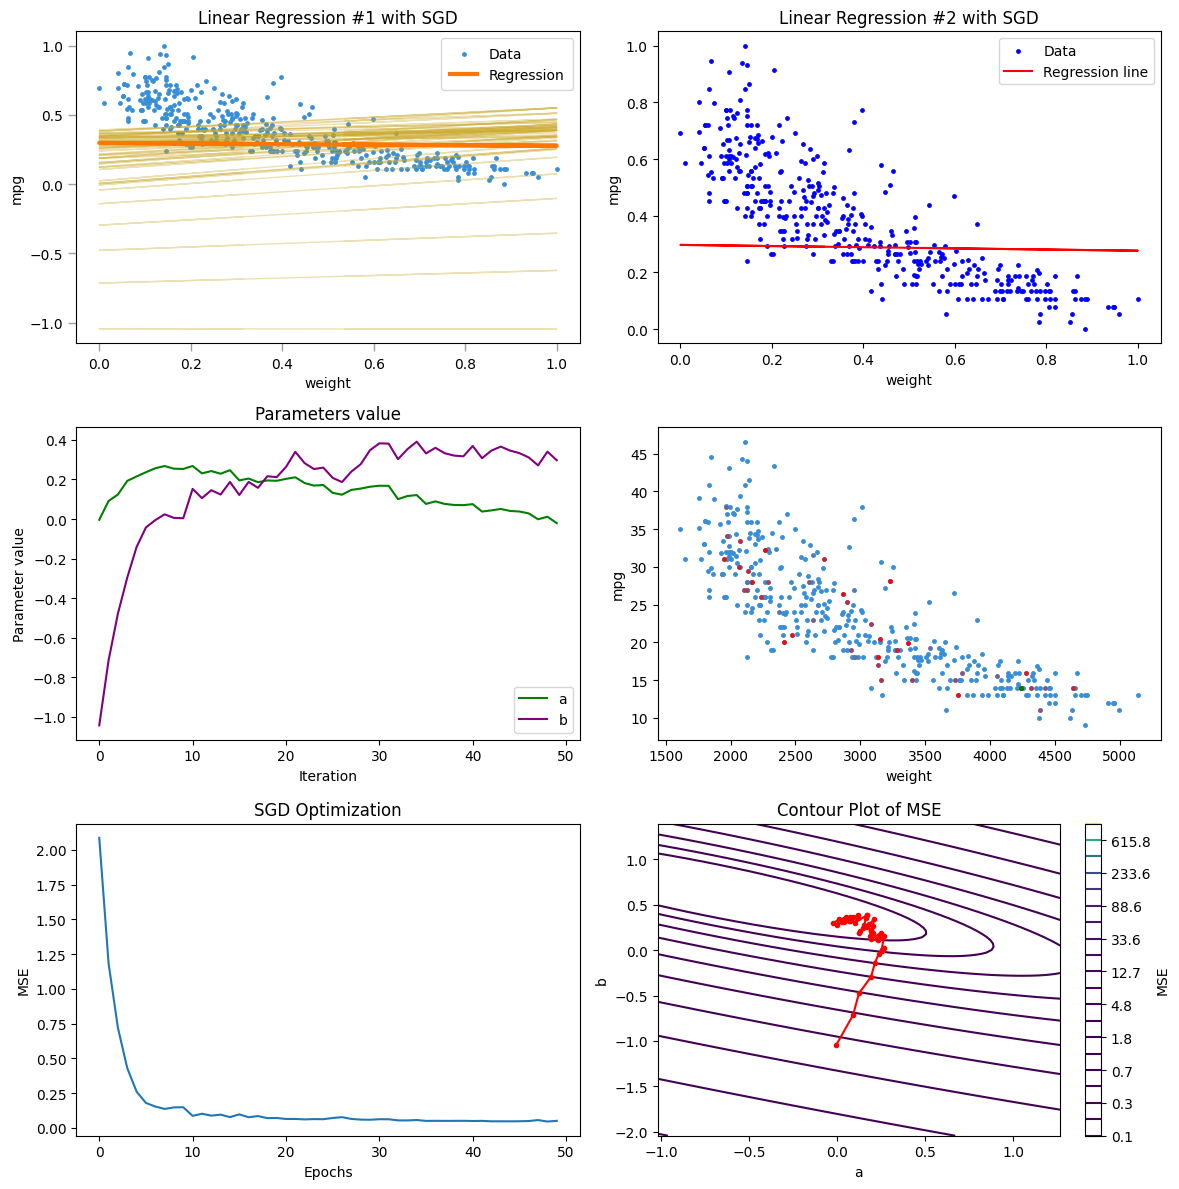

In [43]:
X_orig = df_mpg["weight"]
y_orig = df_mpg["mpg"]
X = scale(X_orig)
y = scale(y_orig)

a, b, mse, indexes = SGD(X=X, y=y, lr=0.1, epoch=50, batch_size=1, seed=22)
a_last = a[-1]
b_last = b[-1]
index_last = indexes[-1]
y_last = a_last*X + b_last

print("MSE:",mean_squared_error(y, y_last), mse[-1])
print("index_last:",indexes[-1])

plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plot_regression(X, y, y_last, a=a, b=b, title="Linear Regression #1 with SGD", xlabel="weight", ylabel="mpg")

plt.subplot(3, 2, 2)
plot_regression2(X, y, a, b, title="Linear Regression #2 with SGD", xlabel="weight", ylabel="mpg")

plt.subplot(3, 2, 3)
plot_parameters_value(a, b)

plt.subplot(3, 2, 4)
plt.scatter(df_mpg["weight"], df_mpg["mpg"], label='Data', c='#388fd8', s=6)
plt.scatter(df_mpg.loc[index_last]["weight"], df_mpg.loc[index_last]["mpg"], label='Data', c='red', s=6, alpha=0.35)
plt.xlabel('weight')
plt.ylabel('mpg') 

# отобразить исходные точки, по которым шёл спуск
plt.subplot(3, 2, 4)
plt.scatter(X_orig, y_orig, label='All data', c='#388fd8', s=6, alpha=0.2)
alpha = 0.05
d_alpha = (1-alpha) / len(indexes)
for i in indexes:
    plt.scatter(df_mpg.loc[i]["weight"], df_mpg.loc[i]["mpg"], label='Gradient way', c='red', s=6, alpha=alpha)
    alpha = alpha + d_alpha if (alpha + d_alpha) < 1 else 1
plt.scatter(df_mpg.loc[index_last]["weight"], df_mpg.loc[index_last]["mpg"], label='Finish dot', c='green', s=6)

plt.subplot(3, 2, 5)
plot_mse(mse)

plt.subplot(3, 2, 6)
plot_contour_mse(a, b, mse)

plt.tight_layout()
plt.show()

## Градиентный спуск

In [44]:
def my_gd(x, y, x_orig, y_orig, n_iterations=201, seed=42, learning_rate=0.1):
    # Начальные значения параметров
    a_n = np.random.randn(1)
    b_n = np.random.randn(1)
    m = len(x)

    # Хранение значений параметров для визуализации
    a_history = [a_n]
    b_history = [b_n]

    # Градиентный спуск
    for iteration in range(n_iterations):
        y_pred = a_n * x + b_n
        error = y_pred - y
        a_gradient = 2/m * np.sum(x * error)
        b_gradient = 2/m * np.sum(error)
        a_n = a_n - learning_rate * a_gradient
        b_n = b_n - learning_rate * b_gradient
        a_history.append(a_n)
        b_history.append(b_n)

    plt.figure(figsize=(10, 5))


    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Data')
    plt.plot(x, a_n * x + b_n, color='red', label='Regression line')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()


    plt.subplot(1, 2, 2)
    plt.plot(a_history, label='a', color='green')
    plt.plot(b_history, label='b', color='purple')
    plt.xlabel('Iteration')
    plt.ylabel('Parameter value')
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(5, 5))
    a_vals = np.linspace(min(a_history) - 1, max(a_history) + 1, 100)
    b_vals = np.linspace(min(b_history) - 1, max(b_history) + 1, 100)
    A, B = np.meshgrid(a_vals, b_vals)
    Z = np.zeros_like(A)

    for i in range(len(A)):
        for j in range(len(B)):
            y_pred = A[i, j] * x + B[i, j]
            Z[i, j] = np.mean((y - y_pred) ** 2)

    plt.contour(A, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
    plt.plot(a_history, b_history, 'ro-', markersize=3)
    plt.xlabel('a')
    plt.ylabel('b')
    plt.title('Contour Plot of MSE')
    plt.colorbar(label='MSE')

    plt.show()



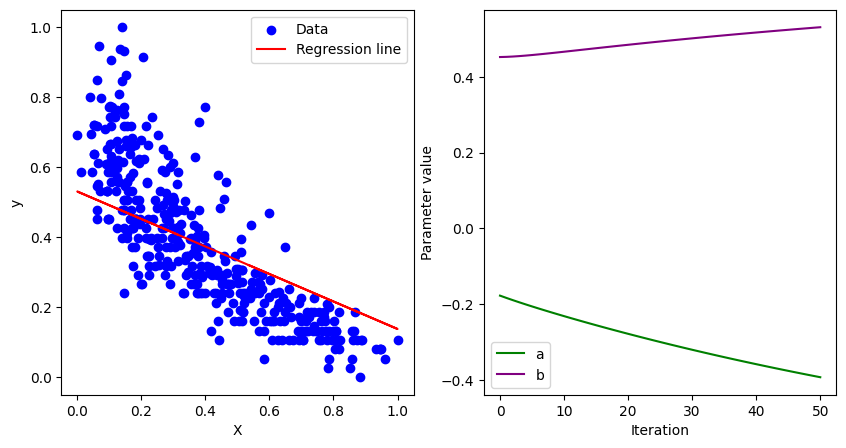

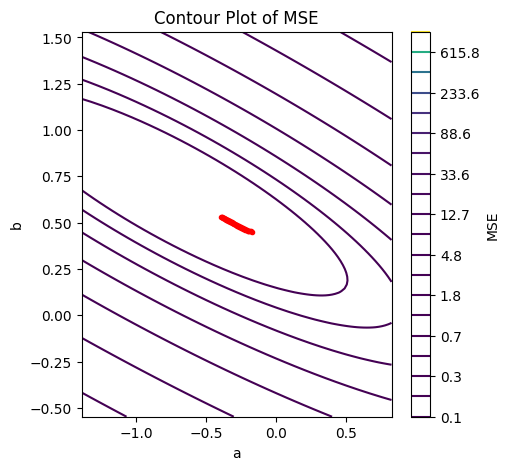

In [45]:
X_orig = df_mpg["weight"]
y_orig = df_mpg["mpg"]
X = scale(X_orig)
y = scale(y_orig)

my_gd(x=X, y=y, x_orig=X_orig, y_orig=y_orig, n_iterations=50, seed=25, learning_rate=0.1)